### This chapter will use MNIST dataset ,consists of 70000 small images of digits handwritten by high school student 

import dataset

In [1]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes',labelsize = 14,titlesize = 14)
plt.rc('legend',fontsize = 14)
plt.rc('xtick',labelsize = 10)
plt.rc('ytick',labelsize = 10)

function to save figures in high res 

In [2]:
from pathlib import Path

IMAGES_PATH = Path()
IMAGES_PATH.mkdir(parents=True,exist_ok=True)

def save_fig(fig_id, tight_layout = True,fig_extension = 'png', resolution=300):
    path = IMAGES_PATH /f'{fig_id}.{fig_extension}'
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path,format= fig_extension,dpi = resolution)

In [3]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784',as_frame= False)

In [4]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [5]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [6]:
X, y = mnist.data, mnist.target
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [8]:
X.shape

(70000, 784)

In [9]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [10]:
y.shape

(70000,)

In [11]:
28 *28

784

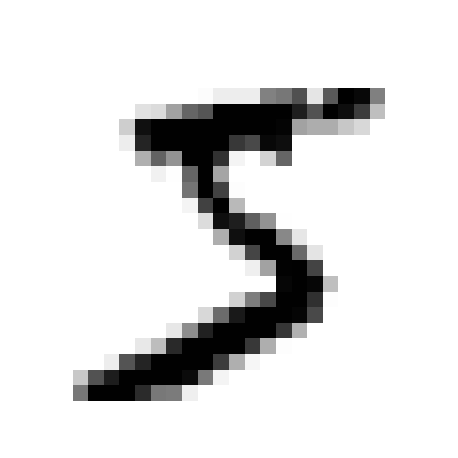

In [12]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28,28)
    plt.imshow(image, cmap='binary')
    plt.axis('off')

some_digit = X[0]
plot_digit(some_digit)
save_fig('some_digit_plot')
plt.show()

In [13]:
y[0]

'5'

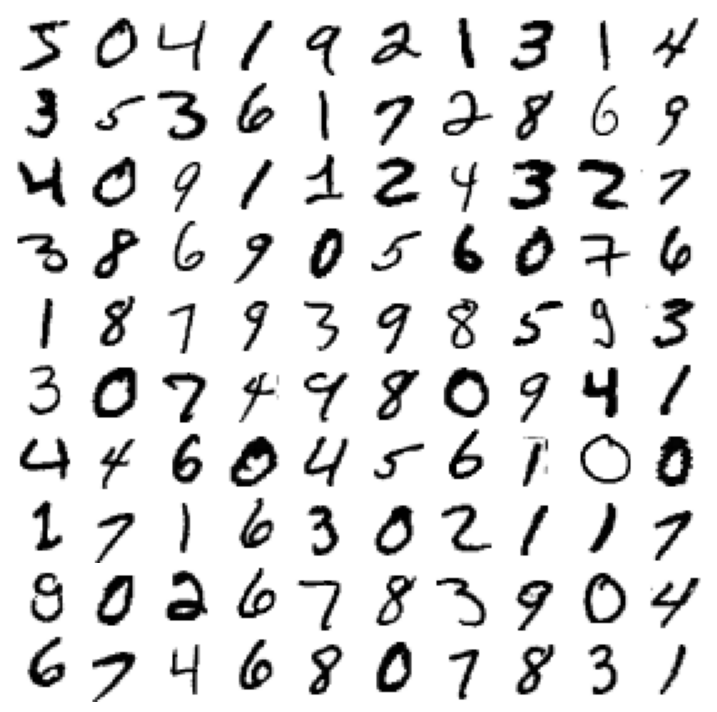

In [14]:
plt.figure(figsize=(9,9))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10,10,idx+1)
    plot_digit(image_data)
plt.subplots_adjust(wspace = 0,hspace=0)
save_fig('more_digits_plot',tight_layout=False)
plt.show()

In [15]:
X_train , X_test , y_train ,y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# <strong>Training a binary classifier

In [16]:
y_train_5 = (y_train =='5')
y_test_5 = (y_test == '5')

In [18]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [19]:
sgd_clf.predict([some_digit])

array([ True])

# Performance Measure

### Measuring accuracy using cross-validation

In [20]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5,cv=3,scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [22]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3)

for train_index, test_index in skfolds.split(X_train,y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred ==y_test_fold)
    print(n_correct/ len(y_pred))

0.95035
0.96035
0.9604


dummy classifier just classifies every single image in the most frequent class , which in this case is the negative class

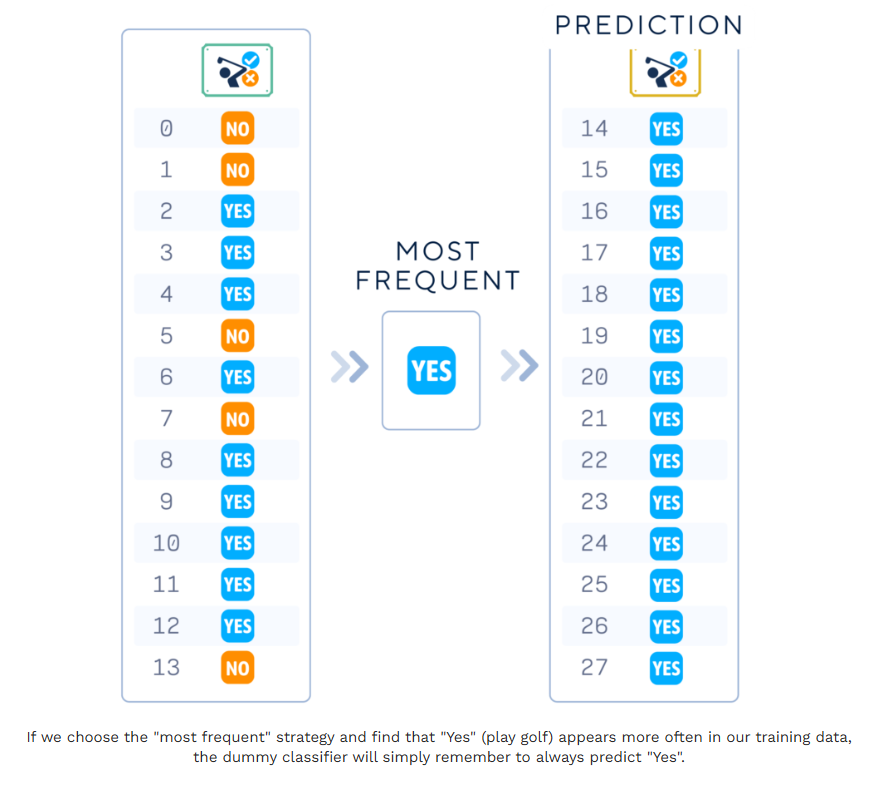

In [23]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))

False


false means it didnt detected any 5 

In [26]:
cross_val_score(dummy_clf, X_train, y_train_5,cv=3, scoring='accuracy')

array([0.90965, 0.90965, 0.90965])

it achieves 90 % accuracy ,it is simply because there is only about 10% of the images are 5 . So the algorithm just always guess every image is not 5 ,to achieve this high accuracy

## Confusion matrix

In [27]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train,y_train_5,cv=3)

In [30]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5,y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [31]:
y_train_perfect_predictions = y_train_5  # pretend we reached perfection
confusion_matrix(y_train_5,y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

## Precision and recall

In [32]:
from sklearn.metrics import precision_score,recall_score

precision_score(y_train_5,y_train_pred)

0.8370879772350012

In [33]:
cm[1,1]/(cm[1,1]+cm[0,1])

0.8370879772350012

In [34]:
recall_score(y_train_5,y_train_pred)

0.6511713705958311

In [36]:
cm[1,1]/(cm[1,1]+cm[1,0])

0.6511713705958311

In [37]:
from sklearn.metrics import f1_score

f1_score(y_train_5,y_train_pred)

0.7325171197343847

## Precision / recall trade off

In [41]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [42]:
threshold =0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [43]:
y_scores > 0

array([ True])

In [45]:
threshold = 3000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [46]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,
                             method='decision_function')

In [49]:
from sklearn.metrics import precision_recall_curve

precisions , recalls , thresholds = precision_recall_curve(y_train_5,y_scores)

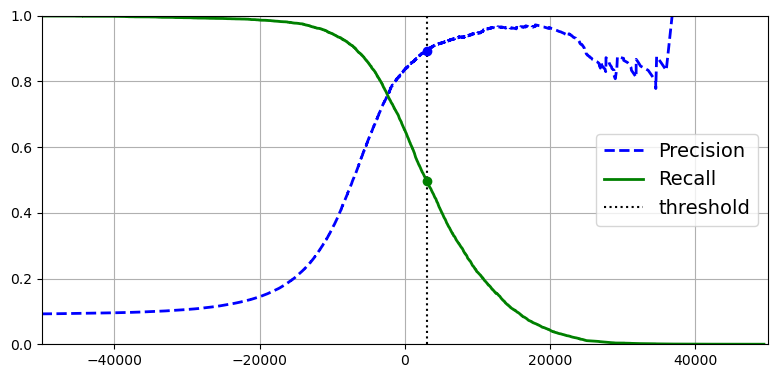

In [63]:
plt.figure(figsize=(8,4))
plt.plot(thresholds, precisions[:-1],'b--',label='Precision',linewidth = 2)
plt.plot(thresholds, recalls[:-1],'g-',label='Recall',linewidth = 2)
plt.vlines(threshold,0,1.0,'k','dotted', label='threshold')

idx = (thresholds >=threshold).argmax()
plt.plot(thresholds[idx],precisions[idx],'bo')
plt.plot(thresholds[idx],recalls[idx],'go')
plt.axis([-50000,50000,0,1])
plt.grid()
plt.legend(loc='center right')
save_fig('precision_recall_vs_threshold_plot')

plt.show()